In [14]:
from utils import generator
# import net_utils
from cv2 import imread, imwrite
import matplotlib.pylab as plt
from os.path import join
import os
import scipy
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [4]:
homedir = r"D:\Generator_DB_Windows" #os.path.expanduser('~')
initcodedir = os.path.join(homedir, 'stimuli/texture006')
natstimdir = os.path.join(homedir, 'stimuli/natimages-guapoCh9')
exp_dir = os.path.join(homedir, 'data/purenoise')

In [21]:
intercept_arr

## Construct the distribution of charateristics in null hypothesis

In [23]:
this_exp_dir = exp_dir
optim_params = {} # Original case
slope_arr = []
intercept_arr = []
PC_max_Amp_arr = []
PC_min_Amp_arr = []
PC_evr_arr = []
trial_num = 100
for trial_i in range(trial_num):
    # random_seed = int(time())
    trial_title = 'choleskycma_sgm3_uf10_trial%d' % (trial_i)
    trialdir = os.path.join(this_exp_dir, trial_title)
    with np.load(os.path.join(trialdir, "codes_all.npz")) as data:
        generations = data["generations"]
        codes_all=data["codes_all"]
        slope, intercept = code_norm_evolve(generations, codes_all, trial_title=trial_title, savedir=trialdir)
        PC_max_Amp, PC_min_Amp, PC_evr = PC_evolve(generations, codes_all, trial_title=trial_title, savedir=trialdir)
        plt.close('all')
        
        slope_arr.append(slope)
        intercept_arr.append(intercept)
        PC_max_Amp_arr.append(PC_max_Amp)
        PC_min_Amp_arr.append(PC_min_Amp)
        PC_evr_arr.append(PC_evr)
slope_arr = np.array(slope_arr)
intercept_arr = np.array(intercept_arr)
PC_max_Amp_arr = np.array(PC_max_Amp_arr)
PC_min_Amp_arr = np.array(PC_min_Amp_arr)
PC_evr_arr = np.array(PC_evr_arr)

In [41]:
np.savez(os.path.join(exp_dir, "pure_noise_summary_stat.npz"), slope_arr = slope_arr,
                                intercept_arr = intercept_arr,
                                PC_max_Amp_arr = PC_max_Amp_arr,
                                PC_min_Amp_arr = PC_min_Amp_arr,
                                PC_evr_arr = PC_evr_arr)

Use only first 40 trials to compute the prior

In [ ]:
gen_limit = 40

In [204]:
this_exp_dir = exp_dir
optim_params = {} # Original case
slope_arr = []
intercept_arr = []
PC_max_Amp_arr = []
PC_min_Amp_arr = []
PC_evr_arr = []
trial_num = 100
for trial_i in range(trial_num):
    # random_seed = int(time())
    trial_title = 'choleskycma_sgm3_uf10_trial%d' % (trial_i)
    trialdir = os.path.join(this_exp_dir, trial_title)
    with np.load(os.path.join(trialdir, "codes_all.npz")) as data:
        generations = data["generations"]
        codes_all=data["codes_all"]
        slope, intercept = code_norm_evolve(generations[generations<gen_limit], codes_all[generations<gen_limit], savefig=False, show=False)
        PC_max_Amp, PC_min_Amp, PC_evr = PC_evolve(generations[generations<gen_limit], codes_all[generations<gen_limit], savefig=False, show=False)

        slope_arr.append(slope)
        intercept_arr.append(intercept)
        PC_max_Amp_arr.append(PC_max_Amp)
        PC_min_Amp_arr.append(PC_min_Amp)
        PC_evr_arr.append(PC_evr)
slope_arr = np.array(slope_arr)
intercept_arr = np.array(intercept_arr)
PC_max_Amp_arr = np.array(PC_max_Amp_arr)
PC_min_Amp_arr = np.array(PC_min_Amp_arr)
PC_evr_arr = np.array(PC_evr_arr)

In [205]:
np.savez(os.path.join(exp_dir, "pure_noise_summary_stat_%d.npz" % gen_limit), slope_arr = slope_arr,
                                intercept_arr = intercept_arr,
                                PC_max_Amp_arr = PC_max_Amp_arr,
                                PC_min_Amp_arr = PC_min_Amp_arr,
                                PC_evr_arr = PC_evr_arr)

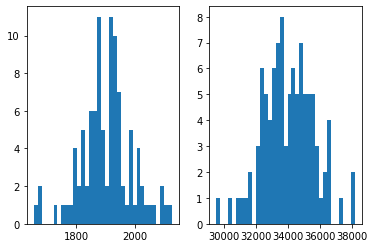

In [29]:
plt.subplot(1,2,1)
plt.hist(slope_arr,bins=35)
plt.title("Linear Slope")
plt.subplot(1,2,2)
plt.hist(intercept_arr,bins=35)
plt.show()

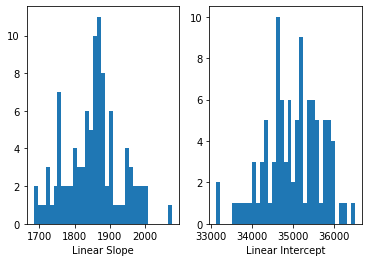

In [206]:
plt.subplot(1,2,1)
plt.hist(slope_arr,bins=35)
plt.xlabel("Linear Slope")
plt.subplot(1,2,2)
plt.hist(intercept_arr,bins=35)
plt.xlabel("Linear Intercept")
plt.show()

In [30]:
PC_max_Amp_arr.shape

(100, 50)

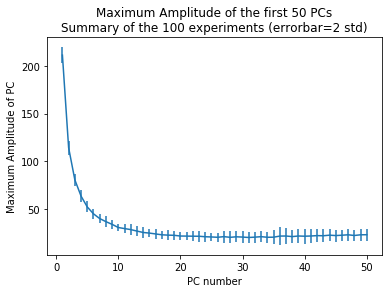

In [35]:
plt.errorbar(np.arange(1,51), PC_max_Amp_arr.mean(axis=0), yerr=2*PC_max_Amp_arr.std(axis=0))
plt.title("Maximum Amplitude of the first 50 PCs\nSummary of the %d experiments (errorbar=2 std)"%trial_num)
plt.ylabel("Maximum Amplitude of PC")
plt.xlabel("PC number")
plt.show()

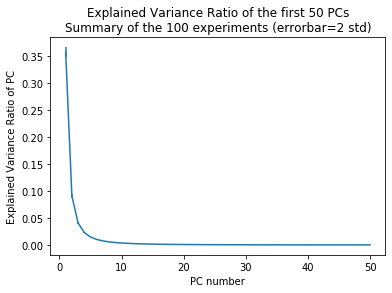

In [40]:
plt.errorbar(np.arange(1,51), PC_evr_arr.mean(axis=0), yerr=2*PC_evr_arr.std(axis=0))
plt.title("Explained Variance Ratio of the first 50 PCs\nSummary of the %d experiments (errorbar=2 std)"%trial_num)
plt.ylabel("Explained Variance Ratio of PC")
plt.xlabel("PC number")
plt.show()

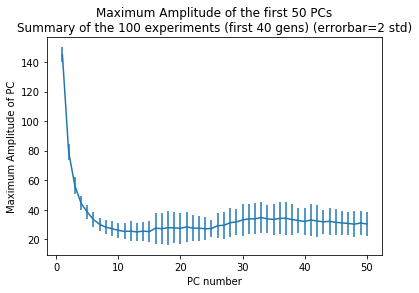

In [207]:
plt.errorbar(np.arange(1,51), PC_max_Amp_arr.mean(axis=0), yerr=2*PC_max_Amp_arr.std(axis=0))
plt.title("Maximum Amplitude of the first 50 PCs\nSummary of the %d experiments (first 40 gens) (errorbar=2 std)"%trial_num)
plt.ylabel("Maximum Amplitude of PC")
plt.xlabel("PC number")
plt.show()

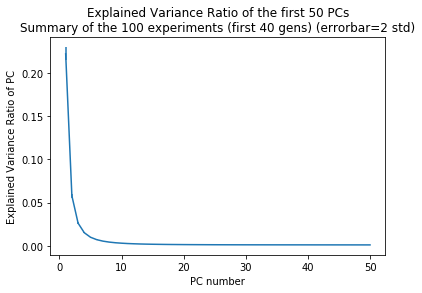

In [208]:
plt.errorbar(np.arange(1,51), PC_evr_arr.mean(axis=0), yerr=2*PC_evr_arr.std(axis=0))
plt.title("Explained Variance Ratio of the first 50 PCs\nSummary of the %d experiments (first 40 gens) (errorbar=2 std)"%trial_num)
plt.ylabel("Explained Variance Ratio of PC")
plt.xlabel("PC number")
plt.show()

## Load Real Data

In [211]:
from scipy.io import loadmat
import h5py
data = h5py.File(r"D:\Project_CMA_Beto_Stats.mat", 'r')

In [ ]:
data.close()

In [103]:
for experiment_i in range(100):
    generations = data[data['StatsB'][experiment_i,0]]['genes']['gen'][:]
    codes_all = data[data['StatsB'][experiment_i,0]]['genes']['all'][:]
    print("Exp %d: %d gens"%(experiment_i, generations.max()), codes_all.shape)

Exp 0: 100 gens (4096, 4030)
Exp 1: 40 gens (4096, 790)
Exp 2: 100 gens (4096, 4030)
Exp 3: 104 gens (4096, 4190)
Exp 4: 72 gens (4096, 2910)
Exp 5: 51 gens (4096, 2070)
Exp 6: 24 gens (4096, 990)
Exp 7: 60 gens (4096, 2430)
Exp 8: 52 gens (4096, 2110)
Exp 9: 56 gens (4096, 2270)
Exp 10: 128 gens (4096, 5150)
Exp 11: 70 gens (4096, 2830)
Exp 12: 70 gens (4096, 2830)
Exp 13: 71 gens (4096, 2870)
Exp 14: 71 gens (4096, 2870)
Exp 15: 60 gens (4096, 2430)
Exp 16: 60 gens (4096, 2430)
Exp 17: 52 gens (4096, 2110)
Exp 18: 52 gens (4096, 2110)
Exp 19: 59 gens (4096, 2390)
Exp 20: 20 gens (4096, 830)
Exp 21: 20 gens (4096, 830)
Exp 22: 50 gens (4096, 2030)
Exp 23: 50 gens (4096, 2030)
Exp 24: 34 gens (4096, 1390)
Exp 25: 34 gens (4096, 1390)
Exp 26: 90 gens (4096, 3630)
Exp 27: 90 gens (4096, 3630)
Exp 28: 50 gens (4096, 2030)
Exp 29: 50 gens (4096, 2030)
Exp 30: 44 gens (4096, 1790)
Exp 31: 44 gens (4096, 1790)
Exp 32: 50 gens (4096, 2030)
Exp 33: 50 gens (4096, 2030)
Exp 34: 46 gens (4096, 1

In [266]:
experiment_i =0
generations = data[data['StatsB'][experiment_i,0]]['genes']['gen'][:]
codes_all = data[data['StatsB'][experiment_i,0]]['genes']['all'][:]
generations = generations[0]
codes_all = codes_all.T
print("Exp %d: %d gens"%(experiment_i, generations.max()), codes_all.shape)

Exp 0: 100 gens (4030, 4096)


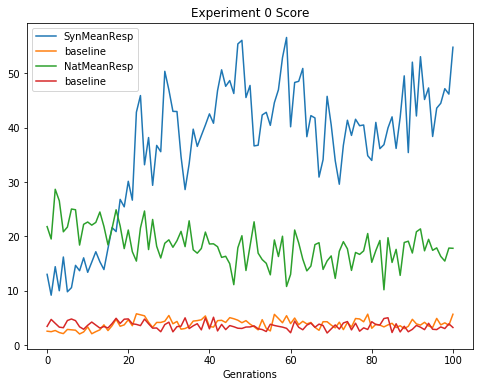

In [267]:
mean_Nat = data[data['StatsB'][experiment_i,0]]['meanResp_nat']
mean_Rsp = data[data['StatsB'][experiment_i,0]]['meanResp_syn']
# 'meanPsth_nat',
#  'meanPsth_syn',
#  'meanResp_nat',
#  'meanResp_syn'
plt.figure(figsize=[8,6])
plt.plot(mean_Rsp[:].T)
plt.plot(mean_Nat[:].T)
plt.legend(["SynMeanResp","baseline","NatMeanResp","baseline",])
plt.xlabel("Genrations")
plt.title("Experiment %d Score"%experiment_i)
plt.show()

In [225]:
slope, intercept = code_norm_evolve(generations, codes_all, savefig=False, trial_title=trial_title, savedir=trialdir)
PC_max_Amp, PC_min_Amp, PC_evr = PC_evolve(generations, codes_all, savefig=False, trial_title=trial_title, savedir=trialdir)

In [268]:
gen_limit = 40
slope, intercept = code_norm_evolve(generations[generations<gen_limit], codes_all[generations<gen_limit, :], savefig=False, trial_title=trial_title, savedir=trialdir)
PC_max_Amp, PC_min_Amp, PC_evr = PC_evolve(generations[generations<gen_limit], codes_all[generations<gen_limit, :], savefig=False, trial_title=trial_title, savedir=trialdir)

In [269]:
trial_num
interc_stat = (intercept_arr>intercept).sum()/len(intercept_arr)
slope_stat = (slope_arr>slope).sum()/len(slope_arr)
evr_stat = (PC_evr_arr>PC_evr).sum(axis=0)/trial_num
max_Amp_stat = (PC_max_Amp_arr > PC_max_Amp).sum(axis=0)/trial_num
min_Amp_stat = (PC_min_Amp_arr > PC_min_Amp).sum(axis=0)/trial_num

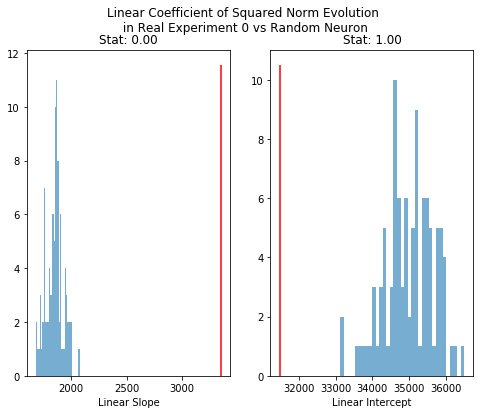

In [271]:
plt.figure(figsize=[8,6])
plt.subplot(1,2,1)
plt.hist(slope_arr, bins=35, alpha=0.6)
plt.vlines(slope, *plt.ylim(),colors='r')
plt.title("Stat: %.2f" % slope_stat)
plt.xlabel("Linear Slope")
plt.subplot(1,2,2)
plt.hist(intercept_arr,bins=35, alpha=0.6)
plt.vlines(intercept, *plt.ylim(),colors='r')
plt.title("Stat: %.2f" % interc_stat)
plt.xlabel("Linear Intercept")
plt.suptitle("Linear Coefficient of Squared Norm Evolution\n in Real Experiment %d vs Random Neuron"%experiment_i)
plt.show()

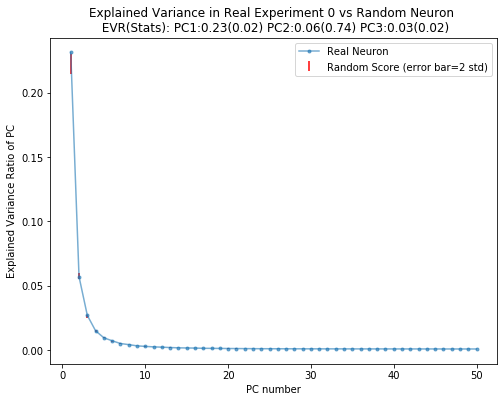

In [272]:
plt.figure(figsize=[8,6])
plt.plot(np.arange(1,51), PC_evr, marker=".", alpha=0.6)
plt.errorbar(np.arange(1,51), PC_evr_arr.mean(axis=0), yerr=2*PC_evr_arr.std(axis=0), fmt='none', ecolor='r')
plt.legend(["Real Neuron", "Random Score (error bar=2 std)" ])
plt.title("Explained Variance in Real Experiment %d vs Random Neuron \n EVR(Stats): PC1:%.2f(%.2f) PC2:%.2f(%.2f) PC3:%.2f(%.2f)"%
          (experiment_i, PC_evr[0], evr_stat[0], PC_evr[1], evr_stat[1], PC_evr[2], evr_stat[2]))
plt.ylabel("Explained Variance Ratio of PC")
plt.xlabel("PC number")
plt.show()

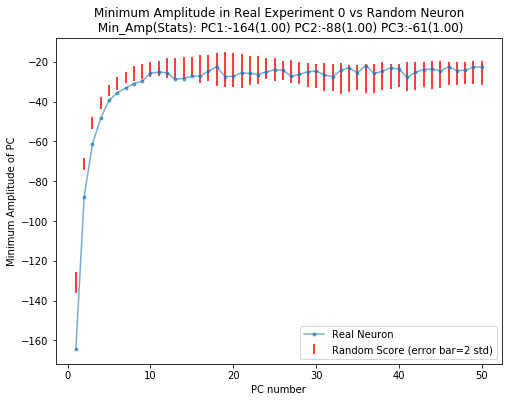

In [273]:
plt.figure(figsize=[8,6])
plt.plot(np.arange(1,51), PC_min_Amp, marker=".", alpha=0.6)
plt.errorbar(np.arange(1,51), PC_min_Amp_arr.mean(axis=0), yerr=2*PC_min_Amp_arr.std(axis=0), fmt='none', ecolor='r')
plt.legend(["Real Neuron", "Random Score (error bar=2 std)" ])
plt.title("Minimum Amplitude in Real Experiment %d vs Random Neuron\n Min_Amp(Stats): PC1:%.f(%.2f) PC2:%.f(%.2f) PC3:%.f(%.2f)"%
          (experiment_i, PC_min_Amp[0], min_Amp_stat[0], PC_min_Amp[1], min_Amp_stat[1], PC_min_Amp[2], min_Amp_stat[2]))
plt.ylabel("Minimum Amplitude of PC")
plt.xlabel("PC number")
plt.show()

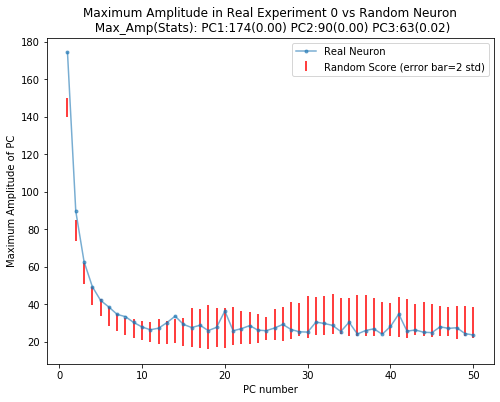

In [274]:
plt.figure(figsize=[8,6])
plt.plot(np.arange(1,51), PC_max_Amp, marker=".", alpha=0.6)
plt.errorbar(np.arange(1,51), PC_max_Amp_arr.mean(axis=0), yerr=2*PC_max_Amp_arr.std(axis=0), fmt='none', ecolor='r')
plt.legend(["Real Neuron", "Random Score (error bar=2 std)" ])
plt.title("Maximum Amplitude in Real Experiment %d vs Random Neuron\n Max_Amp(Stats): PC1:%.f(%.2f) PC2:%.f(%.2f) PC3:%.f(%.2f)"%
          (experiment_i, PC_max_Amp[0], max_Amp_stat[0], PC_max_Amp[1], max_Amp_stat[1], PC_max_Amp[2], max_Amp_stat[2]))
plt.ylabel("Maximum Amplitude of PC")
plt.xlabel("PC number")
plt.show()

## Massive processing

In [278]:
from utils import add_trial_subdir

In [288]:
result_dir = r"C:\Users\ponce\OneDrive\Desktop\OneDrive_Binxu\OneDrive\Evolv_Traj_Statistics"

In [289]:
for experiment_i in range(100):
    trial_dir = add_trial_subdir(result_dir, "Evol%03d"%experiment_i)
    generations = data[data['StatsB'][experiment_i,0]]['genes']['gen'][:]
    codes_all = data[data['StatsB'][experiment_i,0]]['genes']['all'][:]
    generations = generations[0]
    codes_all = codes_all.T
    print("Exp %d: %d gens"%(experiment_i, generations.max()), codes_all.shape)
    mean_Nat = data[data['StatsB'][experiment_i,0]]['meanResp_nat'][:]
    mean_Rsp = data[data['StatsB'][experiment_i,0]]['meanResp_syn'][:]
    # Compute statistics 
    gen_limit = 40 # use the prior for first 40 gens
#     slope, intercept = code_norm_evolve(generations[generations<gen_limit], codes_all[generations<gen_limit, :], 
#                                         savefig=False)
#     PC_max_Amp, PC_min_Amp, PC_evr = PC_evolve(generations[generations<gen_limit], codes_all[generations<gen_limit, :], 
#                                         savefig=False)

#     interc_stat = (intercept_arr>intercept).sum()/len(intercept_arr)
#     slope_stat = (slope_arr>slope).sum()/len(slope_arr)
#     evr_stat = (PC_evr_arr>PC_evr).sum(axis=0)/trial_num
#     max_Amp_stat = (PC_max_Amp_arr > PC_max_Amp).sum(axis=0)/trial_num
#     min_Amp_stat = (PC_min_Amp_arr > PC_min_Amp).sum(axis=0)/trial_num
    visualize_rsp_curve(mean_Rsp, mean_Nat, experiment_i, savedir=trial_dir)
    slope_stat, interc_stat, evr_stat, max_Amp_stat, min_Amp_stat = analyze_statistics_of_trajectory(generations, codes_all, experiment_i, 
                                                                                                     gen_limit=40, savedir=trial_dir)
    

Exp 0: 100 gens (4030, 4096)
Slope(Stats):3347.40(0.00) Intercept(Stats):31481(1.00) 
EVR(Stats): PC1:0.23(0.02) PC2:0.06(0.74) PC3:0.03(0.02)
Min_Amp(Stats): PC1:-164(1.00) PC2:-88(1.00) PC3:-61(1.00)
Max_Amp(Stats): PC1:174(0.00) PC2:90(0.00) PC3:63(0.02)
Exp 1: 40 gens (790, 4096)
Slope(Stats):4067.72(0.00) Intercept(Stats):12907(1.00) 
EVR(Stats): PC1:0.14(1.00) PC2:0.06(0.89) PC3:0.03(0.00)
Min_Amp(Stats): PC1:-113(0.00) PC2:-50(0.00) PC3:-58(1.00)
Max_Amp(Stats): PC1:195(0.00) PC2:211(0.00) PC3:58(0.27)
Exp 2: 100 gens (4030, 4096)
Slope(Stats):3288.40(0.00) Intercept(Stats):31637(1.00) 
EVR(Stats): PC1:0.23(0.03) PC2:0.06(0.74) PC3:0.03(0.28)
Min_Amp(Stats): PC1:-166(1.00) PC2:-86(1.00) PC3:-61(1.00)
Max_Amp(Stats): PC1:170(0.00) PC2:87(0.00) PC3:63(0.01)
Exp 3: 104 gens (4190, 4096)
Slope(Stats):3384.23(0.00) Intercept(Stats):31492(1.00) 
EVR(Stats): PC1:0.23(0.01) PC2:0.06(0.87) PC3:0.03(0.53)
Min_Amp(Stats): PC1:-170(1.00) PC2:-88(1.00) PC3:-61(1.00)
Max_Amp(Stats): PC1:173(0

Max_Amp(Stats): PC1:115(1.00) PC2:60(1.00) PC3:44(1.00)
Exp 64: 20 gens (830, 4096)
Slope(Stats):2191.79(0.00) Intercept(Stats):29734(1.00) 
EVR(Stats): PC1:0.15(1.00) PC2:0.04(1.00) PC3:0.02(1.00)
Min_Amp(Stats): PC1:-101(0.00) PC2:-58(0.00) PC3:-40(0.00)
Max_Amp(Stats): PC1:118(1.00) PC2:62(1.00) PC3:42(1.00)
Exp 65: 20 gens (830, 4096)
Slope(Stats):2114.65(0.00) Intercept(Stats):29525(1.00) 
EVR(Stats): PC1:0.15(1.00) PC2:0.04(1.00) PC3:0.02(1.00)
Min_Amp(Stats): PC1:-99(0.00) PC2:-56(0.00) PC3:-39(0.00)
Max_Amp(Stats): PC1:114(1.00) PC2:57(1.00) PC3:41(1.00)
Exp 66: 20 gens (830, 4096)
Slope(Stats):2085.96(0.00) Intercept(Stats):29735(1.00) 
EVR(Stats): PC1:0.15(1.00) PC2:0.04(1.00) PC3:0.02(1.00)
Min_Amp(Stats): PC1:-99(0.00) PC2:-57(0.00) PC3:-39(0.00)
Max_Amp(Stats): PC1:113(1.00) PC2:57(1.00) PC3:42(1.00)
Exp 67: 26 gens (1070, 4096)
Slope(Stats):2086.44(0.00) Intercept(Stats):30054(1.00) 
EVR(Stats): PC1:0.18(1.00) PC2:0.05(1.00) PC3:0.02(1.00)
Min_Amp(Stats): PC1:-113(0.00) P

Max_Amp(Stats): PC1:143(0.78) PC2:75(0.94) PC3:53(0.87)
Exp 96: 40 gens (1630, 4096)
Slope(Stats):1782.28(0.79) Intercept(Stats):31683(1.00) 
EVR(Stats): PC1:0.22(0.83) PC2:0.06(0.36) PC3:0.03(0.90)
Min_Amp(Stats): PC1:-126(0.04) PC2:-70(0.17) PC3:-48(0.03)
Max_Amp(Stats): PC1:141(0.96) PC2:80(0.36) PC3:49(1.00)
Exp 97: 40 gens (1630, 4096)
Slope(Stats):2102.37(0.00) Intercept(Stats):30141(1.00) 
EVR(Stats): PC1:0.23(0.01) PC2:0.06(0.59) PC3:0.03(0.58)
Min_Amp(Stats): PC1:-138(1.00) PC2:-69(0.08) PC3:-49(0.21)
Max_Amp(Stats): PC1:148(0.12) PC2:81(0.22) PC3:53(0.85)
Exp 98: 87 gens (3510, 4096)
Slope(Stats):1987.07(0.04) Intercept(Stats):31526(1.00) 
EVR(Stats): PC1:0.22(0.29) PC2:0.06(0.16) PC3:0.03(0.01)
Min_Amp(Stats): PC1:-131(0.45) PC2:-73(0.86) PC3:-50(0.28)
Max_Amp(Stats): PC1:149(0.04) PC2:80(0.35) PC3:53(0.89)
Exp 99: 27 gens (1110, 4096)
Slope(Stats):2036.87(0.01) Intercept(Stats):30114(1.00) 
EVR(Stats): PC1:0.18(1.00) PC2:0.05(1.00) PC3:0.02(1.00)
Min_Amp(Stats): PC1:-113(0.

In [290]:
# Compute difference between successful and unsuccessful evolutions 
import re

In [291]:
f = open(r'C:/Users/ponce/OneDrive/Desktop/OneDrive_Binxu/OneDrive/Evolv_Traj_Statistics/log_output.txt', 'r') 
stats_log_str = f.read() 

In [356]:
pattern

'Exp (\\d+): (\\d+) gens \\(\\d+, \\d+\\)\nSlope\\(Stats\\):([-\\d\\.]+)\\(([\\d\\.]+)\\) Intercept\\(Stats\\):([\\d]+)\\(([\\d\\.]+)\\)\nEVR\\(Stats\\): PC1:([\\d\\.]+)\\(([\\d\\.]+)\\) PC2:([\\d\\.]+)\\(([\\d\\.]+)\\) PC3:([\\d\\.]+)\\(([\\d\\.]+)\\)\n'

In [364]:

pattern = "Exp (\d+): (\d+) gens \(\d+, \d+\)\nSlope\(Stats\):([-\d\.]+)\(([\d\.]+)\) Intercept\(Stats\):([\d]+)\(([\d\.]+)\) \n"\
"EVR\(Stats\): PC1:([\d\.]+)\(([\d\.]+)\) PC2:([\d\.]+)\(([\d\.]+)\) PC3:([\d\.]+)\(([\d\.]+)\)\n"\
"Min_Amp\(Stats\): PC1:([-\d\.]+)\(([\d\.]+)\) PC2:([-\d\.]+)\(([\d\.]+)\) PC3:([-\d\.]+)\(([\d\.]+)\)\n"\
"Max_Amp\(Stats\): PC1:([-\d\.]+)\(([\d\.]+)\) PC2:([-\d\.]+)\(([\d\.]+)\) PC3:([-\d\.]+)\(([\d\.]+)\)"
# pattern = "Exp \d+"
# "\nExp 0: 100 gens (4030, 4096)\nSlope(Stats):3347.40(0.00) Intercept(Stats):31481(1.00) \nEVR(Stats): PC1:0.23(0.02) PC2:0.06(0.74) PC3:0.03(0.02)\nMin_Amp(Stats): PC1:-164(1.00) PC2:-88(1.00) PC3:-61(1.00)\nMax_Amp(Stats): PC1:174(0.00) PC2:90(0.00) PC3:63(0.02)\n"
result =re.findall(pattern, stats_log_str)
len(result)

100

In [365]:
import pandas as pd

In [366]:
exp_stat = pd.DataFrame.from_records(result)

In [390]:
col_name=["Exp #", "Gen #", "Slope", "p","Intercept","p", 
          "PC1_EVR", "p", "PC2_EVR", "p", "PC3_EVR", "p", 
          "PC1_minAmp", "p", "PC2_minAmp", "p", "PC3_minAmp", "p", 
          "PC1_maxAmp", "p", "PC2_maxAmp", "p", "PC3_maxAmp", "p", ]

In [402]:
exp_stat.rename(columns={i:col_name[i] for i in range(len(col_name))}, inplace=True)

In [380]:
exp_stat=exp_stat.astype(np.float32)

In [407]:
exp_stat.to_csv(r"C:\Users\ponce\OneDrive\Desktop\OneDrive_Binxu\OneDrive\Evolv_Traj_Statistics\Exp_Stat.csv")

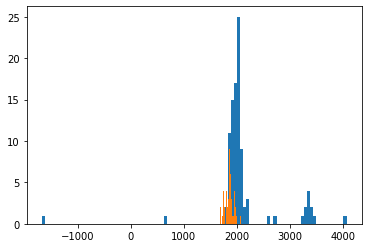

In [408]:
plt.hist(exp_stat['Slope'],bins=100)
plt.hist(slope_arr, bins=50)
plt.show()

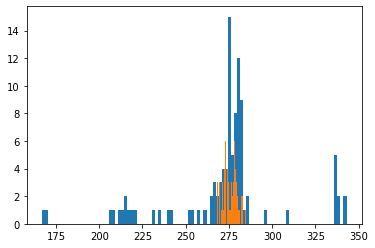

In [411]:
plt.hist(exp_stat['PC1_maxAmp'] - exp_stat['PC1_minAmp'],bins=100)
plt.hist(PC_max_Amp_arr[:,0] - PC_min_Amp_arr[:,0], bins=50)
plt.show()

In [409]:
PC_min_Amp_arr.shape

(100, 50)

In [370]:
exp_stat.rename(dict(["Exp #", "Gen #", "Slope", "p","Intercept","p", "PC1_EVR", "p", "PC2_EVR", "p", ])

TypeError: 'list' object is not callable

In [369]:
exp_stat

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0,100,3347.40,0.00,31481,1.00,0.23,0.02,0.06,0.74,...,-88,1.00,-61,1.00,174,0.00,90,0.00,63,0.02
1,1,40,4067.72,0.00,12907,1.00,0.14,1.00,0.06,0.89,...,-50,0.00,-58,1.00,195,0.00,211,0.00,58,0.27
2,2,100,3288.40,0.00,31637,1.00,0.23,0.03,0.06,0.74,...,-86,1.00,-61,1.00,170,0.00,87,0.00,63,0.01
3,3,104,3384.23,0.00,31492,1.00,0.23,0.01,0.06,0.87,...,-88,1.00,-61,1.00,173,0.00,89,0.00,61,0.05
4,4,72,3384.19,0.00,32533,1.00,0.23,0.02,0.06,0.36,...,-86,1.00,-62,1.00,168,0.00,87,0.00,62,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,36,2105.16,0.00,29517,1.00,0.22,0.28,0.05,1.00,...,-68,0.06,-50,0.38,143,0.78,75,0.94,53,0.87
96,96,40,1782.28,0.79,31683,1.00,0.22,0.83,0.06,0.36,...,-70,0.17,-48,0.03,141,0.96,80,0.36,49,1.00
97,97,40,2102.37,0.00,30141,1.00,0.23,0.01,0.06,0.59,...,-69,0.08,-49,0.21,148,0.12,81,0.22,53,0.85
98,98,87,1987.07,0.04,31526,1.00,0.22,0.29,0.06,0.16,...,-73,0.86,-50,0.28,149,0.04,80,0.35,53,0.89


## Plotting Utility

In [8]:
def code_norm_evolve(generations, codes_all, savefig=True, show=False, savedir="", trial_title=""):
    code_norm = np.sum(codes_all**2, axis=1)#np.sqrt()
    model = LinearRegression().fit(generations.reshape(-1, 1), code_norm)
    if savefig or show:
        plt.figure(figsize=[10,6])
        plt.scatter(generations, code_norm,s=10,alpha =0.7)
        plt.title("Code Norm Square ~ Gen \n %s\n  Linear Coefficient %.f Intercept %.f"%(trial_title, model.coef_[0], model.intercept_))
        plt.ylabel("Code Norm Squared")
        plt.xlabel("Generations")
        if savefig:
            plt.savefig(os.path.join(savedir, "code_norm_evolution.png"))
        if show:
            plt.show()
    return model.coef_[0], model.intercept_

In [11]:
pca = PCA(n_components=50,copy=True)
PC_codes = pca.fit_transform(codes_all)

In [45]:
def PC_evolve(generations, codes_all, 
              savefig=True, show=False, savedir="", trial_title=""):
    pca = PCA(n_components=50,copy=True)
    PC_codes = pca.fit_transform(codes_all)
    PC_max_Amp = PC_codes.max(axis=0)
    PC_min_Amp = PC_codes.min(axis=0)
    if show or savefig:
        plt.figure(figsize=[10,6])
        for i in range(10):
            plt.scatter(generations,PC_codes[:,i],s=6,alpha=0.6)
        plt.xlabel("Generations")
        plt.ylabel("PC projection")
        plt.title("PC Projections \n %s"%(trial_title))
        if savefig:
            plt.savefig(os.path.join(savedir, "PC_Proj_evolution.png"))
        if show:
            plt.show()

        plt.figure(figsize=[8,8])
        cumsumvar = np.cumsum(pca.explained_variance_ratio_)
        #plt.plot(pca.explained_variance_ratio_)
        plt.plot(cumsumvar)
        for mark in [5, 10, 25, 50]:
            plt.hlines(cumsumvar[mark-1], 0, mark-1, 'r')
        plt.ylabel("Ratio")
        plt.xlabel("PC number")
        plt.title("%s\n Explained Variance %.2f in 10 PC \nExplained Variance %.2f in 25 PC"%(trial_title, 
                                                                                              sum(pca.explained_variance_ratio_[:10]),
                                                                                              sum(pca.explained_variance_ratio_[:20])))
        if savefig:
            plt.savefig(os.path.join(savedir, "exp_variance.png"))
        if show:
            plt.show()

        # PC_visualization(PC_codes, pca.components_, trial_title=trial_title)
        plt.figure(figsize=[15,5])
        for i in range(10):
            max_Amp = PC_max_Amp[i]
            min_Amp = PC_min_Amp[i]
            mean_Amp = PC_codes[:, i].mean()
            for row, (Amp, name) in enumerate(zip([max_Amp, min_Amp, mean_Amp], ["Max", "Min", "Mean"])):
                img = generator.visualize(Amp*pca.components_[i, :])
                plt.subplot(3,10,i+1 + 10 * row)
                plt.imshow(img)
                plt.title("%.1f" % Amp)
                plt.xticks([])
                plt.yticks([])
                if i == 0:
                    plt.ylabel(name)
        plt.suptitle("Visualize first 10 PC's images \n %s"%(trial_title, ))
        if savefig:
            plt.savefig(os.path.join(savedir,"PC_visualization.png"))
        if show:
            plt.show()
    return PC_max_Amp, PC_min_Amp, pca.explained_variance_ratio_, 

In [286]:
def visualize_rsp_curve(mean_Rsp, mean_Nat, experiment_i,
                       savefig=True, show=False, savedir=""):
    plt.figure(figsize=[8,6])
    plt.plot(mean_Rsp.T)
    plt.plot(mean_Nat.T)
    plt.legend(["SynMeanResp","baseline","NatMeanResp","baseline",])
    plt.xlabel("Genrations")
    plt.title("Experiment %d Score"%experiment_i)
    if savefig:
        plt.savefig(os.path.join(savedir,"Resp_Score.png"))
    if show:
        plt.show()
    else:
        plt.close()

def analyze_statistics_of_trajectory(generations, codes_all, experiment_i, gen_limit=40, 
                                     intercept_arr=intercept_arr, slope_arr=slope_arr, PC_max_Amp_arr=PC_max_Amp_arr, PC_min_Amp_arr=PC_min_Amp_arr,
                                     savefig=True, show=False, savedir=""):
    slope, intercept = code_norm_evolve(generations[generations<gen_limit], codes_all[generations<gen_limit, :],  savefig=False)
    PC_max_Amp, PC_min_Amp, PC_evr = PC_evolve(generations[generations<gen_limit], codes_all[generations<gen_limit, :],  savefig=False)

    interc_stat = (intercept_arr>intercept).sum()/len(intercept_arr)
    slope_stat = (slope_arr>slope).sum()/len(slope_arr)
    evr_stat = (PC_evr_arr>PC_evr).sum(axis=0)/trial_num
    max_Amp_stat = (PC_max_Amp_arr > PC_max_Amp).sum(axis=0)/trial_num
    min_Amp_stat = (PC_min_Amp_arr > PC_min_Amp).sum(axis=0)/trial_num
    
    plt.figure(figsize=[8,6])
    plt.subplot(1,2,1)
    plt.hist(slope_arr, bins=35, alpha=0.6)
    plt.vlines(slope, *plt.ylim(),colors='r')
    plt.title("Slope(Stats):%.2f(%.2f)" % (slope, slope_stat))
    plt.xlabel("Linear Slope")
    plt.subplot(1,2,2)
    plt.hist(intercept_arr,bins=35, alpha=0.6)
    plt.vlines(intercept, *plt.ylim(),colors='r')
    plt.title("Intercept(Stats):%.f(%.2f)" % (intercept, interc_stat))
    plt.xlabel("Linear Intercept")
    plt.suptitle("Linear Coefficient of Squared Norm Evolution\n in Real Experiment %d vs Random Neuron"%experiment_i)
    if savefig:
        plt.savefig(os.path.join(savedir,"SqNorm_Linear_Coef_stat.png"))
    if show:
        plt.show()
    else:
        plt.close()
    print("Slope(Stats):%.2f(%.2f) Intercept(Stats):%.f(%.2f) " % (slope, slope_stat, intercept, interc_stat))
    
    plt.figure(figsize=[8,6])
    plt.plot(np.arange(1,51), PC_evr, marker=".", alpha=0.6)
    plt.errorbar(np.arange(1,51), PC_evr_arr.mean(axis=0), yerr=2*PC_evr_arr.std(axis=0), fmt='none', ecolor='r')
    plt.legend(["Real Neuron", "Random Score (error bar=2 std)" ])
    plt.title("Explained Variance in Real Experiment %d vs Random Neuron \n EVR(Stats): PC1:%.2f(%.2f) PC2:%.2f(%.2f) PC3:%.2f(%.2f)"%
              (experiment_i, PC_evr[0], evr_stat[0], PC_evr[1], evr_stat[1], PC_evr[2], evr_stat[2]))
    plt.ylabel("Explained Variance Ratio of PC")
    plt.xlabel("PC number")
    if savefig:
        plt.savefig(os.path.join(savedir,"PC_EVR_stat.png"))
    if show:
        plt.show()
    else:
        plt.close()
    print("EVR(Stats): PC1:%.2f(%.2f) PC2:%.2f(%.2f) PC3:%.2f(%.2f)"%
              (PC_evr[0], evr_stat[0], PC_evr[1], evr_stat[1], PC_evr[2], evr_stat[2]))
    
    plt.figure(figsize=[8,6])
    plt.plot(np.arange(1,51), PC_min_Amp, marker=".", alpha=0.6)
    plt.errorbar(np.arange(1,51), PC_min_Amp_arr.mean(axis=0), yerr=2*PC_min_Amp_arr.std(axis=0), fmt='none', ecolor='r')
    plt.legend(["Real Neuron", "Random Score (error bar=2 std)" ])
    plt.title("Minimum Amplitude in Real Experiment %d vs Random Neuron\n Min_Amp(Stats): PC1:%.f(%.2f) PC2:%.f(%.2f) PC3:%.f(%.2f)"%
              (experiment_i, PC_min_Amp[0], min_Amp_stat[0], PC_min_Amp[1], min_Amp_stat[1], PC_min_Amp[2], min_Amp_stat[2]))
    plt.ylabel("Minimum Amplitude of PC")
    plt.xlabel("PC number")
    if savefig:
        plt.savefig(os.path.join(savedir,"PC_min_Amp_stat.png"))
    if show:
        plt.show()
    else:
        plt.close()
    print("Min_Amp(Stats): PC1:%.f(%.2f) PC2:%.f(%.2f) PC3:%.f(%.2f)"%
              (PC_min_Amp[0], min_Amp_stat[0], PC_min_Amp[1], min_Amp_stat[1], PC_min_Amp[2], min_Amp_stat[2]))
    
    plt.figure(figsize=[8,6])
    plt.plot(np.arange(1,51), PC_max_Amp, marker=".", alpha=0.6)
    plt.errorbar(np.arange(1,51), PC_max_Amp_arr.mean(axis=0), yerr=2*PC_max_Amp_arr.std(axis=0), fmt='none', ecolor='r')
    plt.legend(["Real Neuron", "Random Score (error bar=2 std)" ])
    plt.title("Maximum Amplitude in Real Experiment %d vs Random Neuron\n Max_Amp(Stats): PC1:%.f(%.2f) PC2:%.f(%.2f) PC3:%.f(%.2f)"%
              (experiment_i, PC_max_Amp[0], max_Amp_stat[0], PC_max_Amp[1], max_Amp_stat[1], PC_max_Amp[2], max_Amp_stat[2]))
    plt.ylabel("Maximum Amplitude of PC")
    plt.xlabel("PC number")
    if savefig:
        plt.savefig(os.path.join(savedir,"PC_max_Amp_stat.png"))
    if show:
        plt.show()
    else:
        plt.close()
    print("Max_Amp(Stats): PC1:%.f(%.2f) PC2:%.f(%.2f) PC3:%.f(%.2f)"%
              (PC_max_Amp[0], max_Amp_stat[0], PC_max_Amp[1], max_Amp_stat[1], PC_max_Amp[2], max_Amp_stat[2]))
    return slope_stat, interc_stat, evr_stat, max_Amp_stat, min_Amp_stat